### Clustering - DBSCAN


- Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.


- Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.


- Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [3]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import env
import acquire

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler


In [4]:
df = acquire.get_grocery_data()

In [5]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [7]:
df.describe()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,219.500000,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,0.000000,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,109.750000,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,219.500000,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,329.250000,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,439.000000,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df.columns = df.columns.str.lower()

In [14]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = df[["grocery", "milk", "fresh"]]
grocery_milk_fresh.head(2)

,grocery,milk,fresh
0,7561,9656,12669
1,9568,9810,7057


In [15]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(grocery_milk_fresh)

# Use the scaler
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)
grocery_milk_fresh

array([[0.08146416, 0.13072723, 0.11294004],
       [0.10309667, 0.13282409, 0.06289903],
       [0.08278992, 0.11918086, 0.05662161],
       ...,
       [0.32594285, 0.21013575, 0.1295431 ],
       [0.02402535, 0.02622442, 0.091727  ],
       [0.02702178, 0.02237109, 0.02482434]])

In [16]:
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)

DBSCAN(eps=0.1, min_samples=20)

In [17]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["grocery", "milk", "fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.customer_id)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,Scaled_grocery,Scaled_milk,Scaled_fresh
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626


In [18]:
# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    409
-1     31
Name: labels, dtype: int64

In [19]:
df.head()

,customer_id,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,Scaled_grocery,Scaled_milk,Scaled_fresh,labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626,0


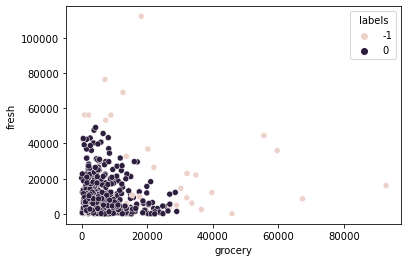

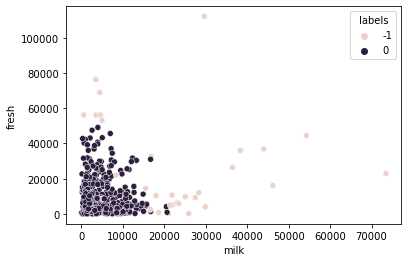

In [21]:
sns.scatterplot(df.grocery, df.fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.milk, df.fresh, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

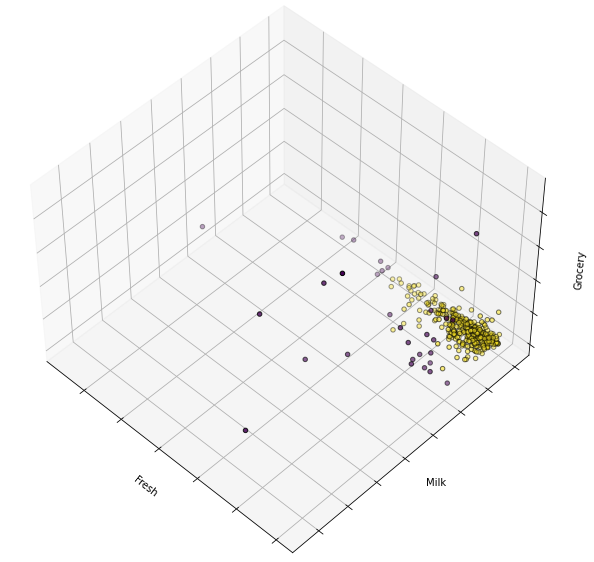

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.fresh, df.milk, df.grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

In [24]:
frozen_paper_deli = df[["frozen", "detergents_paper", "delicassen"]]
frozen_paper_deli.head()

,frozen,detergents_paper,delicassen
0,214,2674,1338
1,1762,3293,1776
2,2405,3516,7844
3,6404,507,1788
4,3915,1777,5185


In [25]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(frozen_paper_deli)

# Use the scaler
frozen_paper_deli = scaler.transform(frozen_paper_deli)
frozen_paper_deli

array([[0.0031063 , 0.0654272 , 0.02784731],
       [0.02854842, 0.08058985, 0.03698373],
       [0.03911643, 0.08605232, 0.16355861],
       ...,
       [0.00677142, 0.36346267, 0.03888194],
       [0.01664914, 0.00404174, 0.04426366],
       [0.00065742, 0.01161082, 0.00102211]])

In [26]:
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(frozen_paper_deli)

DBSCAN(eps=0.1, min_samples=20)

In [27]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["frozen", "paper", "deli"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(frozen_paper_deli, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.customer_id)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,Scaled_grocery,Scaled_milk,Scaled_fresh,labels,Scaled_frozen,Scaled_paper,Scaled_deli
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940,0,0.003106,0.065427,0.027847
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899,0,0.028548,0.080590,0.036984
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622,0,0.039116,0.086052,0.163559
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254,0,0.104842,0.012346,0.037234
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626,0,0.063934,0.043455,0.108093


In [28]:
# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels2'] = dbsc.labels_
df.labels2.value_counts()

 0    423
-1     17
Name: labels2, dtype: int64

In [29]:
df.head()

,customer_id,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,Scaled_grocery,Scaled_milk,Scaled_fresh,labels,Scaled_frozen,Scaled_paper,Scaled_deli,labels2
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940,0,0.003106,0.065427,0.027847,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899,0,0.028548,0.080590,0.036984,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622,0,0.039116,0.086052,0.163559,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254,0,0.104842,0.012346,0.037234,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626,0,0.063934,0.043455,0.108093,0


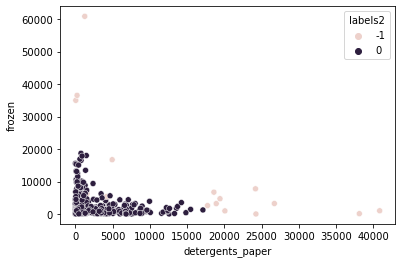

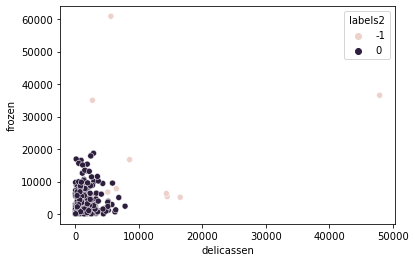

In [31]:
sns.scatterplot(df.detergents_paper, df.frozen, hue=df.labels2)
plt.show()

sns.scatterplot(df.delicassen, df.frozen, hue=df.labels2)
plt.show()

Text(0.5, 0, 'Deli')

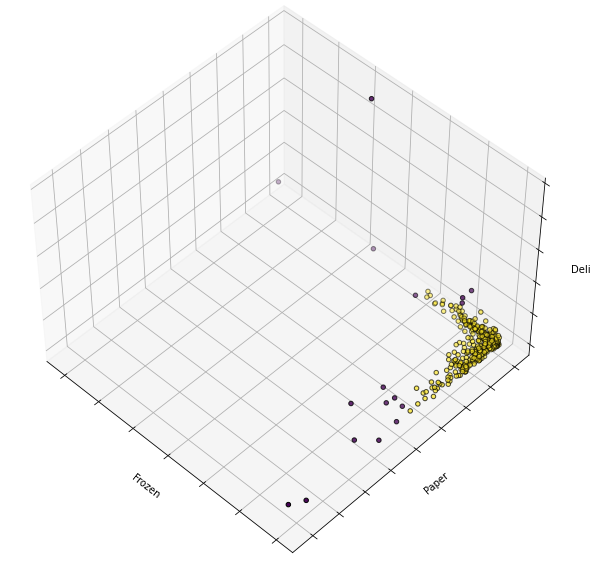

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.frozen, df.detergents_paper, df.delicassen,
           c=df.labels2, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Paper')
ax.set_zlabel('Deli')

In [33]:
df = acquire.get_curriculum_data()

In [34]:
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
